In [5]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

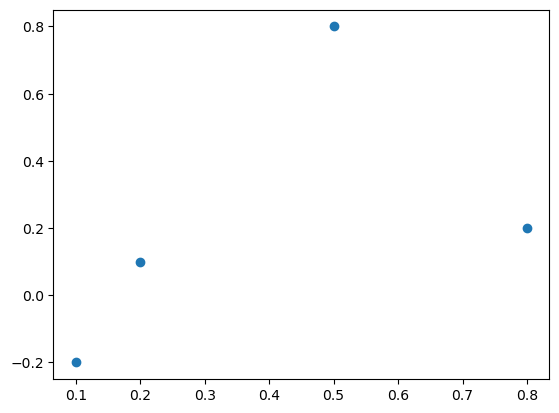

In [4]:
X_init = np.array([0.1,0.2,0.5,0.8])
Y_init = np.array([-0.2,0.1,0.8,0.2])

plt.scatter(X_init,Y_init)

In [67]:
lengthscale_gp = 0.2
variance_gp = 1**2

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_gp,variance=variance_gp)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_init.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

array([0])

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fd916ae4ee0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fd914e0deb0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fd914e21100>]}

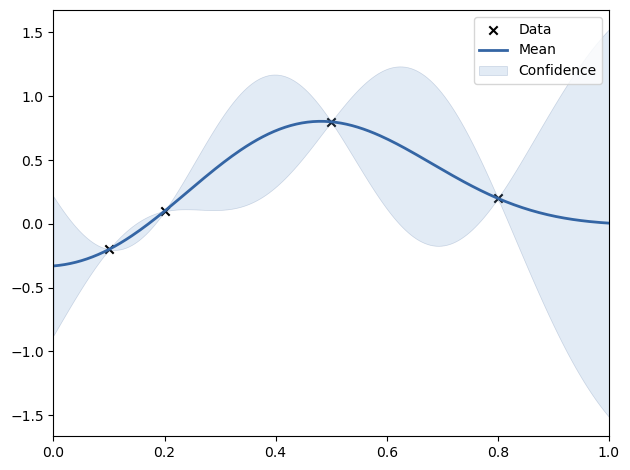

In [78]:
m.plot([0,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


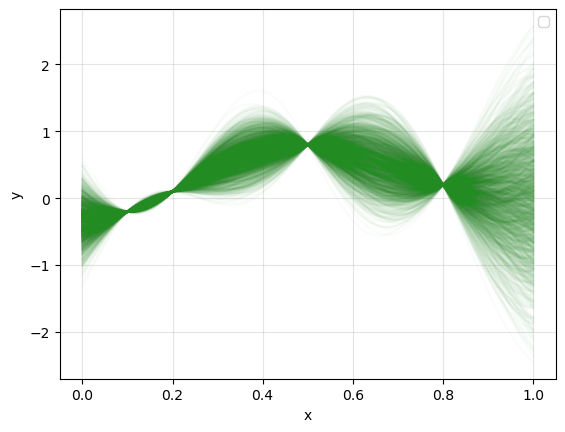

In [81]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    plt.plot(X_total,sample_gp,color='forestgreen',alpha=0.025)

plt.xlabel('x')
plt.ylabel('y')


plt.grid(color='grey',alpha=0.2)
plt.legend()
plt.savefig('gp_1.png')

logGP

In [53]:
variance_loggp = 0.01**2
lengthscale_loggp = 0.2
mean_loggp = np.log(1/0.01)
C = 1/0.01

In [54]:
kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_loggp,variance=1)  #np.sqrt(res[0])
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_init.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(10**(-5))

array([0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


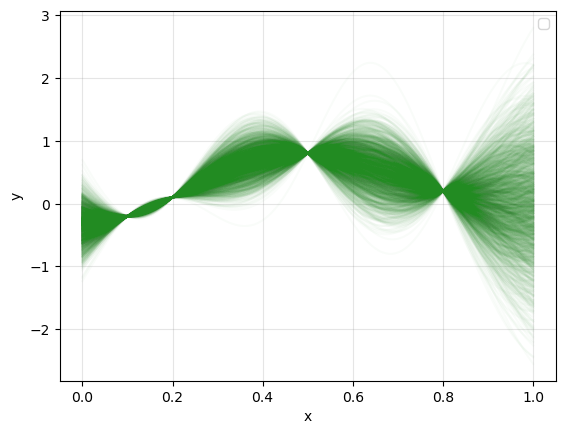

In [82]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_loggp = np.exp(sample_gp*0.01+mean_loggp)-C
    plt.plot(X_total,sample_loggp,color='forestgreen',alpha=0.025)
    
plt.xlabel('x')
plt.ylabel('y')

plt.grid(color='grey',alpha=0.2)
plt.legend()
plt.savefig('loggp_0.01.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


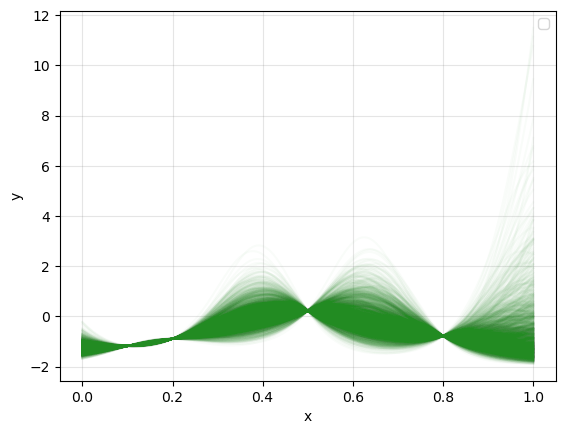

In [83]:
X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(2000):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_loggp = np.exp(sample_gp)-2
    plt.plot(X_total,sample_loggp,color='forestgreen',alpha=0.025)
    
plt.xlabel('x')
plt.ylabel('y')

#plt.title('logGP ($\sigma^2=1$)')
plt.grid(color='grey',alpha=0.2)
plt.legend()
plt.savefig('loggp_1.png')